In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Plotting figures of Sec. V.A.1 ($X=10^{-5}$ Teukolsky wave) in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
import sys

pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 1.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

# Analytic solution

In [3]:
def F(amp, tau, rc, time):
    orig_F = amp * np.exp(-(time-rc)**2/tau**2)
    return orig_F

In [4]:
def ddddF(amp, tau, rc, time):
    orig_F = F(amp, tau, rc, time)
    x = time - rc
    return orig_F * (16*x**4 - 48.*x**2*tau**2 + 12*tau**4)/tau**8

In [5]:
maxtime = 50
time = np.arange(0, maxtime, 0.05)
ana = np.sqrt(6.*np.pi/5) * ddddF(1e-5, 2, 21, time)

# Plotting waveform quantities at future null infinity

Reproducing Fig. 4 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [6]:
def loaddata(name,time):
    data = np.loadtxt(name+'.dat')
    data_interp = interp1d(data[:,0], data[:,1])(time)
    return data_interp

## Strain

In [7]:
name = 'Strain'

cce299_int = loaddata('299cce/'+name, time)
cce288_int = loaddata('288cce/'+name, time)

ccm299_int = loaddata('299ccm/'+name, time)
ccm288_int = loaddata('288ccm/'+name, time)

title_name = '$h_{l=2,m=0}$'
yminu = 1e-13
ymaxu = 5e-5
ymin = 1e-13
ymax = 3e-7

Text(0.5, 0, 'Time')

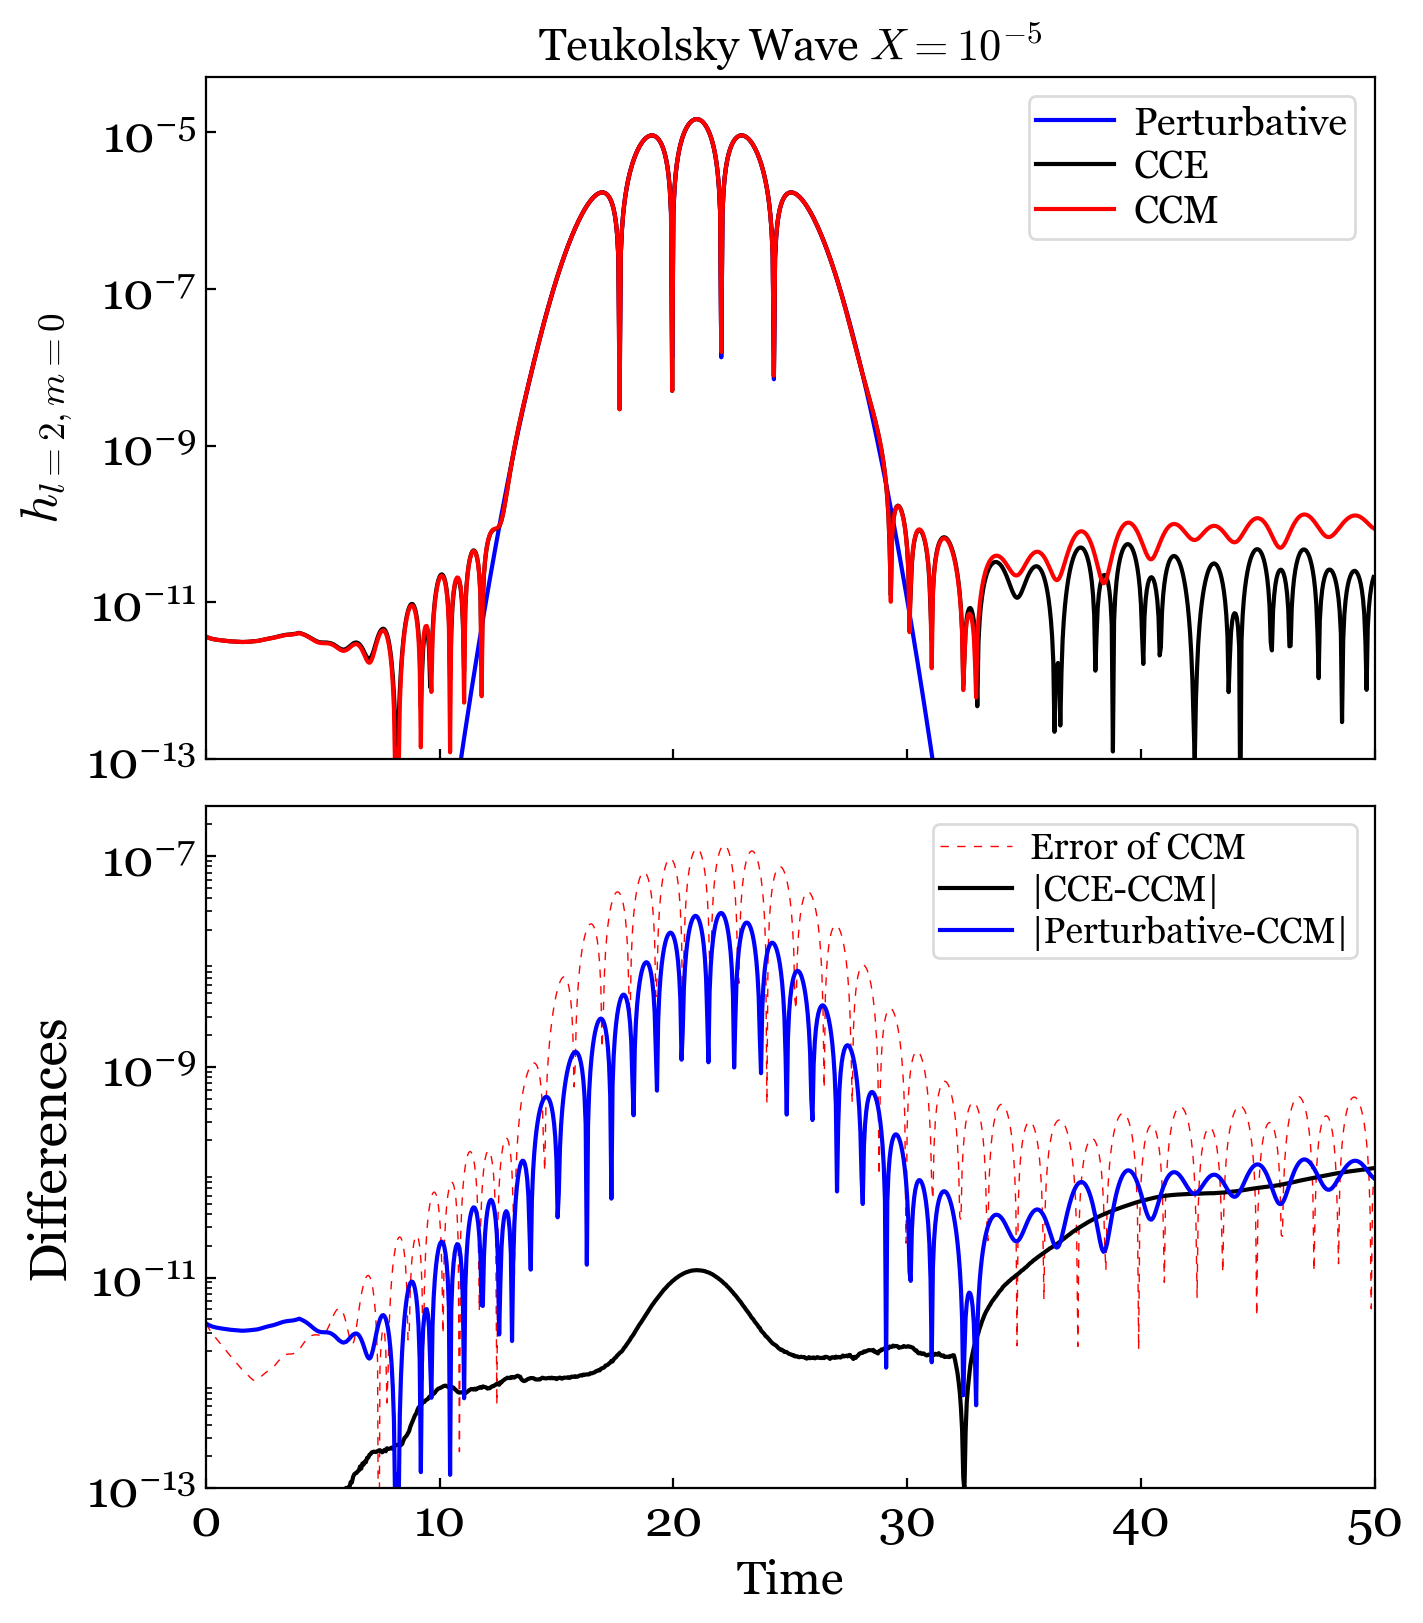

In [8]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ana), label='Perturbative', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce299_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm299_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_ylim(ymin, ymaxu)
ax[0].set_ylabel(title_name, fontsize=19)
ax[0].set_title(r'Teukolsky Wave $X=10^{-5}$', fontsize=16)

ax[1].semilogy(time,abs(ccm288_int-ccm299_int), label='Error of CCM',\
               ls='--', color='r', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time,abs(ccm299_int-cce299_int), label='|CCE-CCM|',\
               color='k', lw=1.5)
ax[1].semilogy(time, abs(ana-ccm299_int), label='|Perturbative-CCM|',\
               color='b', lw=1.5)
ax[1].legend(ncol=1,loc='best', fontsize=13)
ax[1].set_ylim(ymin, ymax)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10, numticks=5))
ax[1].yaxis.set_major_locator(LogLocator(10, numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time',fontsize=17)

# GH constraints

Reproducing Fig. 3 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [9]:
constrain299ccm = np.loadtxt('299ccm/Norms.dat')
constrain288ccm = np.loadtxt('288ccm/Norms.dat')
constrain277ccm = np.loadtxt('277ccm/Norms.dat')

/var/folders/_h/wn4r4b915954xqlh974cy17c0000gn/T/ipykernel_16091/672983699.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  pl.subplots_adjust(hspace = 0.02)


(0.0, 210.0)

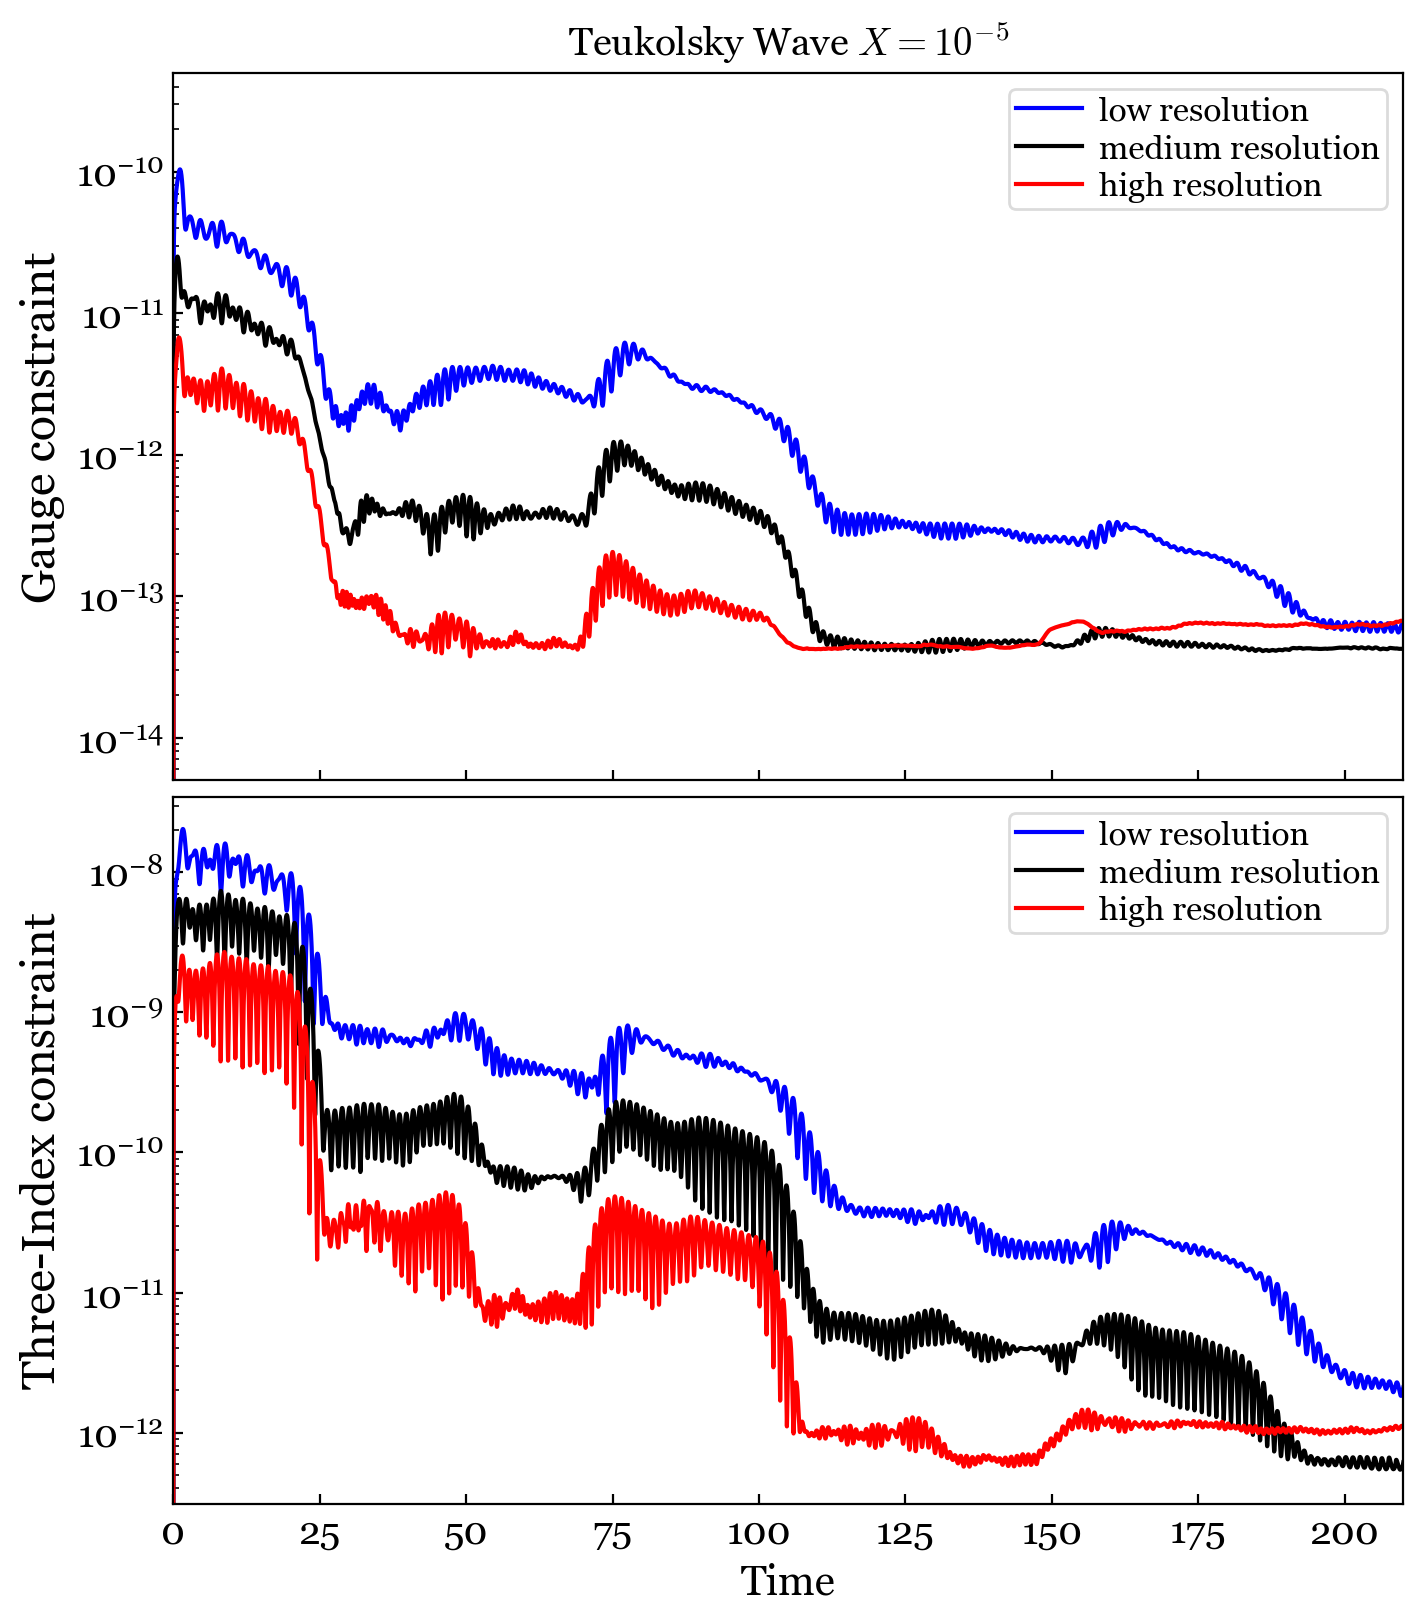

In [10]:
fig, ax=pl.subplots(2, 1, figsize=(7,8), constrained_layout=True, sharex=True)
pl.subplots_adjust(hspace = 0.02)

indd=3
ax[0].semilogy(constrain277ccm[:,0], constrain277ccm[:,indd], 'b',\
               label='low resolution')
ax[0].semilogy(constrain288ccm[:,0], constrain288ccm[:,indd], 'k',\
               label='medium resolution')
ax[0].semilogy(constrain299ccm[:,0], constrain299ccm[:,indd], 'r',\
               label='high resolution')
ax[0].set_title(r'Teukolsky Wave $X=10^{-5}$', fontsize=14)
ax[0].set_ylim(5e-15, 5e-10)
ax[0].set_ylabel('Gauge constraint')
ax[0].legend()

indd=4
ax[1].semilogy(constrain277ccm[:,0], constrain277ccm[:,indd], 'b',\
               label='low resolution')
ax[1].semilogy(constrain288ccm[:,0], constrain288ccm[:,indd], 'k',\
               label='medium resolution')
ax[1].semilogy(constrain299ccm[:,0], constrain299ccm[:,indd], 'r',\
               label='high resolution')
ax[1].legend()
ax[1].set_ylabel('Three-Index constraint')
ax[1].set_xlabel('Time', fontsize=15)
ax[1].set_xlim(0,210)